# Analysis 2

## Finding out the top vehicle type involved in collision and death for each borough in NYC

In [1]:
import matplotlib.pyplot as plt # importing the required packages
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd

In [2]:
from pandas import Series, DataFrame 
rawdataweather = pd.read_csv('ProcessedData\\weather.csv') #importing the weather dataset

In [3]:
rawdataweather['DATE'] = pd.to_datetime(rawdataweather['DATE']) #converting the date column into datetime format
rawdataweather[:2]

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,MDPR,MDSF,DAPR,DASF,...,PGTM,WT09,WT01,WT06,WT05,WT02,WT11,WT04,WT08,WT03
0,GHCND:US1NYWC0003,WHITE PLAINS 3.1 NNW NY US,71.0,41.0639,-73.7722,2015-01-01,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,GHCND:US1NYWC0003,WHITE PLAINS 3.1 NNW NY US,71.0,41.0639,-73.7722,2015-01-02,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
weather = DataFrame(rawdataweather,columns=['DATE', 'SNOW', 'SNWD','PRCP']) # selecting required columns from the weather dataset
weather[:10]

,DATE,SNOW,SNWD,PRCP
0,2015-01-01,0.0,0.0,0.00
1,2015-01-02,0.0,0.0,0.00
2,2015-01-03,0.0,0.0,0.00
3,2015-01-06,0.0,0.0,0.00
4,2015-01-07,0.0,0.0,0.03
5,2015-01-08,0.0,0.0,0.00
6,2015-01-09,0.0,0.0,0.02
7,2015-01-14,0.0,0.0,0.00
8,2015-01-15,0.0,0.0,0.00
9,2015-01-16,0.0,0.0,0.00


In [2]:
from pandas import Series, DataFrame
rawdata = pd.read_csv('ProcessedData\\NYPD_Motor_Vehicle_Collisions.csv') # reading the main dataset
rawdata[:2]

C:\Users\mites\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/04/2017,0:00,BROOKLYN,11206,40.700830,-73.933140,"(40.70083, -73.93314)",EVERGREEN AVENUE,NOLL STREET,NaN,...,NaN,NaN,NaN,NaN,3646753,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1,04/04/2017,0:00,BROOKLYN,11221,40.698307,-73.923256,"(40.698307, -73.923256)",NaN,NaN,1353 MYRTLE AVENUE,...,Unspecified,NaN,NaN,NaN,3646754,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN


In [3]:
rawdata['DATE'] = pd.to_datetime(rawdata['DATE']) #converting the date column into datetime format
mask = rawdata[(rawdata['DATE'] > '2015-01-01') & (rawdata['DATE'] < '2017-04-04')] #selecting a data range of data from the dataset
mask[:2]

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
24,2017-03-27,10:59,NaN,NaN,40.74613,-73.83605,"(40.74613, -73.83605)",NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3640276,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
49,2017-04-03,0:53,QUEENS,11372,40.74788,-73.89068,"(40.74788, -73.89068)",NaN,NaN,37-53 75 STREET,...,NaN,NaN,NaN,NaN,3644254,PASSENGER VEHICLE,NaN,NaN,NaN,NaN


### Plotting a graph of vehicle type to most people killed in a borough

In [5]:
veh = mask.groupby(['BOROUGH','VEHICLE TYPE CODE 1']).agg({'NUMBER OF PERSONS KILLED':sum}) #grouping by borugh and no. of person killed

In [6]:
g = veh['NUMBER OF PERSONS KILLED'].groupby(level=0, group_keys=False)

In [7]:
res = g.apply(lambda x: x.sort_values(ascending=False)) #arranging the values in descending order

In [8]:
resframe = DataFrame(res)

In [11]:
resframe.to_csv('vehicle.csv') #printing the values into CSV file

NUMBER OF PERSONS KILLED
BOROUGH       VEHICLE TYPE CODE 1                                     
BRONX         PASSENGER VEHICLE                                     23
              SPORT UTILITY / STATION WAGON                          6
              MOTORCYCLE                                             6
              VAN                                                    2
              TAXI                                                   2
              SCOOTER                                                1
              UNKNOWN                                                1
              OTHER                                                  1
              LIVERY VEHICLE                                         1
              BUS                                                    1
              SMALL COM VEH(4 TIRES)                                 0
              PICK-UP TRUCK                                          0
              PEDICAB                                                0
              LARGE COM VEH(6 OR MORE TIRES)                         0
              FIRE TRUCK                                             0
              BICYCLE                                                0
              AMBULANCE                                              0
BROOKLYN      PASSENGER VEHICLE                                     48
              SPORT UTILITY / STATION WAGON                         22
              BUS                                                    6
              LARGE COM VEH(6 OR MORE TIRES)                         6
              MOTORCYCLE                                             4
              TAXI                                                   4
              BICYCLE                                                4
              VAN                                                    3
              OTHER                                                  2
              PICK-UP TRUCK                                          2
              SMALL COM VEH(4 TIRES)                                 2
              UNKNOWN                                                1
              LIVERY VEHICLE                                         1
...                                                                ...
QUEENS        UNKNOWN                                                6
              LARGE COM VEH(6 OR MORE TIRES)                         5
              MOTORCYCLE                                             4
              VAN                                                    3
              BICYCLE                                                3
              TAXI                                                   1
              SMALL COM VEH(4 TIRES)                                 1
              PICK-UP TRUCK                                          1
              BUS                                                    1
              SCOOTER                                                0
              OTHER                                                  0
              LIVERY VEHICLE                                         0
              FIRE TRUCK                                             0
              AMBULANCE                                              0
STATEN ISLAND PASSENGER VEHICLE                                     10
              SPORT UTILITY / STATION WAGON                          6
              MOTORCYCLE                                             3
              PICK-UP TRUCK                                          2
              UNKNOWN                                                1
              VAN                                                    0
              TAXI                                                   0
              SMALL COM VEH(4 TIRES)                                 0
              SCOOTER                                                0
              OTHER                                                  0

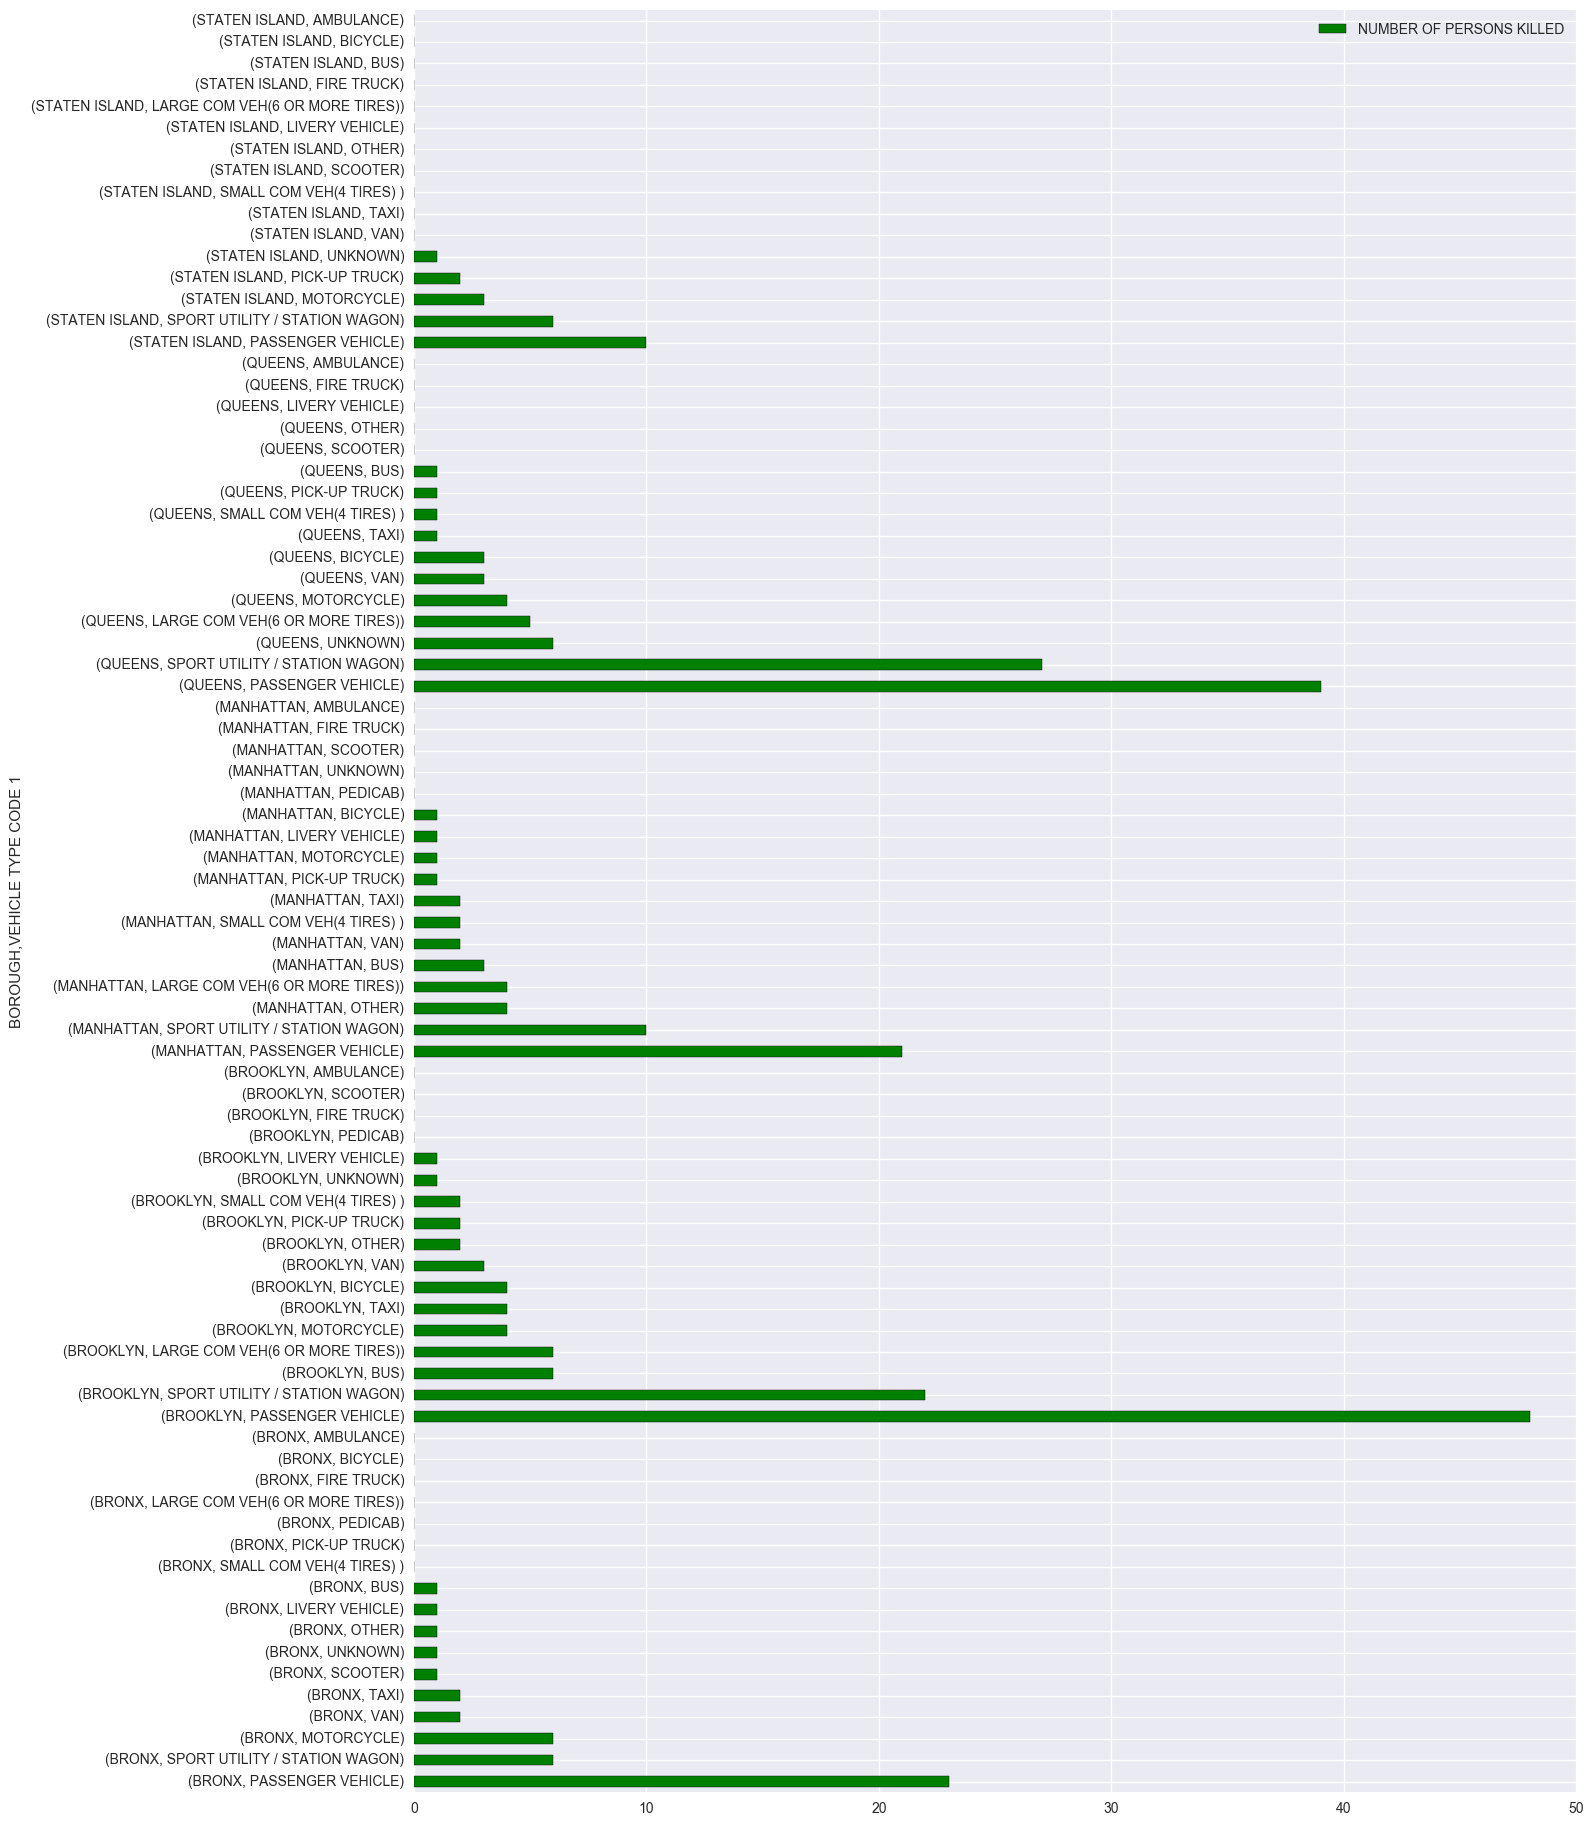

In [14]:
%matplotlib inline # plotting the graph
a = resframe.plot(kind='barh', color='green')
fig = a.get_figure()
fig.set_size_inches(15, 23)

In [15]:
fig.savefig("vehicle.png") #saving the plot as a PNG image